In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from scipy.stats import norm
from scipy.optimize import curve_fit
from utils import simulateSigma

height = 64
width = 64
image0 = np.zeros((height, width), dtype=np.uint8) 

# Error_std-Blur

In [10]:
thetaSigmaList = []
rhoSigmaList = []
noise = 10
high = 110
low = 70
start = 0.5
end = 2
step = 0.05
blurList = np.arange(start, end, step)

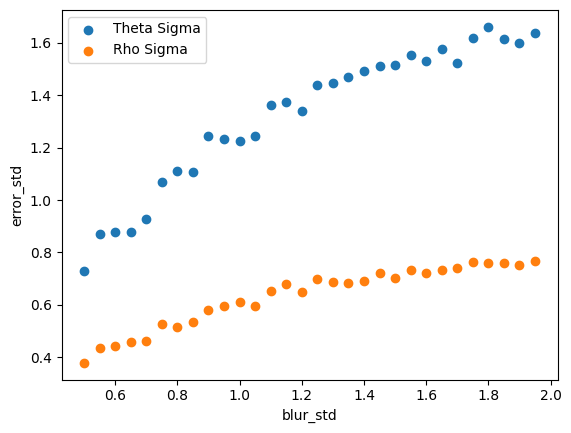

In [11]:
# 检查当前文件夹中是否存在Results路径
if not os.path.exists("Results"):
    os.makedirs("Results")

for blur in blurList:
    # print(f"===========noise {noise}==========")
    thetaSigma, rhoSigma = simulateSigma(image0, noise_std=noise, low=low, high=high, Blur=True, Blur_std=blur, iterNum=4000, draw=False)
    thetaSigmaList.append(thetaSigma)
    rhoSigmaList.append(rhoSigma)

# 将三个list转换为NumPy数组
blurList = np.array(blurList)
thetaSigmaList = np.array(thetaSigmaList)
rhoSigmaList = np.array(rhoSigmaList)

# 保存为.npy文件
np.save(f'Results/Blur_start{start}_end{end}_high{high}_low{low}_noise{noise}.npy', [blurList, thetaSigmaList, rhoSigmaList])

plt.figure()
plt.scatter(blurList, thetaSigmaList, label='Theta Sigma')
plt.scatter(blurList, rhoSigmaList, label='Rho Sigma')
plt.xlabel("blur_std")
plt.ylabel("error_std")
plt.legend()
plt.savefig(f"Results/Blur_start{start}_end{end}_high{high}_low{low}_noise{noise}.png")

# Blur_std load data and draw curve

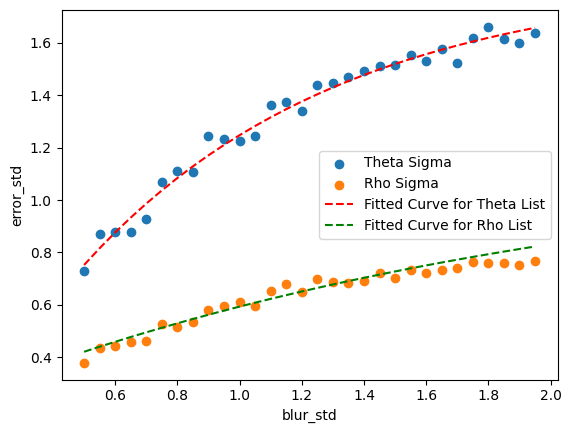

In [39]:
blurList, thetaSigmaList, rhoSigmaList = np.load(f"Results/Blur_start{start}_end{end}_high{high}_low{low}_noise{noise}.npy")

# def func(x, a, b):
#     return a + b * x
def func(x, a, b, c):
    return a + b * np.exp(c * x)

plt.figure()
plt.scatter(blurList, thetaSigmaList, label='Theta Sigma')
plt.scatter(blurList, rhoSigmaList, label='Rho Sigma')
plt.xlabel("blur_std")
plt.ylabel("error_std")
plt.plot(blurList, func(blurList, 1.85, -2, -1.2), 'r--', label='Fitted Curve for Theta List')
plt.plot(blurList, func(blurList, 1.2, -1, -0.5), 'g--', label='Fitted Curve for Rho List')
plt.legend()

In [ ]:
# popt, pcov = curve_fit(func, blurList, thetaSigmaList)

# # popt包含最优参数估计值
# a_theta = popt[0]
# b_theta = popt[1]

# popt, pcov = curve_fit(func, blurList, rhoSigmaList)

# # popt包含最优参数估计值
# a_rho = popt[0]
# b_rho = popt[1]